In [2]:
##导入画图库
import numpy as np
#导入读取数据的库
import pandas as pd

In [3]:
#数据的输入路径
path = 'land_cover.csv'

In [4]:
#导入数据
#lc是land_cover的缩写,df是数据类型dataframe的缩写
lc_df=pd.read_csv(path)
lc_ar=np.array(lc_df)
# print(lc_ar)
#转换成字典dict
lc_di=lc_df.to_dict()
# print(lc_di)
#nic是无索引列no index column的缩写
lc_nicdf=pd.read_csv(path,index_col=None)
# print(lc)

In [5]:
#筛选数据
#al是土地类型Item中土地类型为农田agriculture land的部分,同理ol
al_df=lc_df[lc_df.Item=='Agricultural land']
ol_df=lc_df[lc_df.Item=='Other land']
# print(al)

In [6]:
#制作画图数据

#v代表Value变量
al_vdf=al_df.Value
al_var=np.array(al_vdf)
# print(al_vdf)
# print(al_var)

ol_vdf=ol_df.Value
ol_1990var=np.array(ol_vdf)
#补齐ol_var的长度
ol_29var=np.zeros(29)
ol_var=np.append(ol_29var,ol_1990var)

#y代表Year变量
al_ydf=al_df.Year
al_yar=np.array(al_ydf)

ol_ydf=ol_df.Year
# print(ol_ydf)
ol_yar=np.array(ol_ydf)

#计算占比
al_perdf=al_var/(ol_var+al_var)*1
ol_perdf=ol_var/(ol_var+al_var)*1
al_perdf=al_perdf[29:]
ol_perdf=ol_perdf[29:]
print(ol_perdf)
# print(al_perdf)
# print(ol_perdf)

[0.26785117 0.27069792 0.2658596  0.27540154 0.26139572 0.27069368
 0.26803288 0.27298475 0.27062997 0.28688067 0.28432178 0.28421389
 0.29812937 0.31015139 0.33306323 0.31926823 0.3313738  0.34793096
 0.3620638  0.37385314 0.38947816 0.36562036 0.37454043 0.39224105
 0.38009353 0.43609979 0.43529203 0.39363652 0.41738761 0.40952435
 0.42053348]


In [7]:
#导入画图库
from matplotlib import pyplot as plt
from matplotlib import animation
import mpl_toolkits.axisartist as axisartist

In [8]:
#设置字体提前设置
from matplotlib import rcParams
config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

In [9]:
#数据的输出路径
figname='土地利用.jpg'
figname3d='土地利用3d.jpg'

<Figure size 1296x360 with 0 Axes>

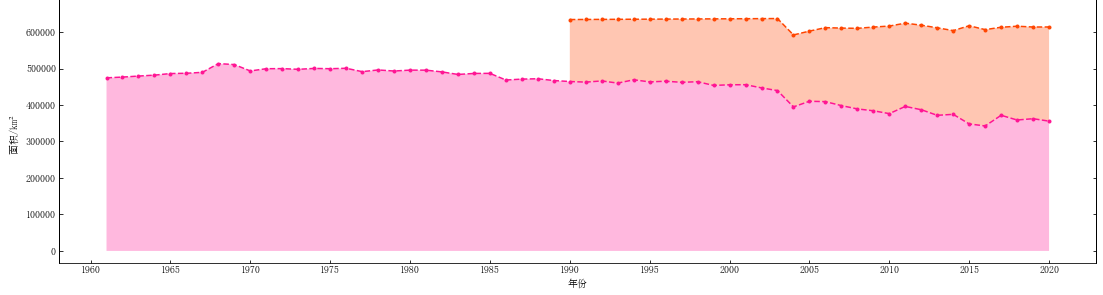

In [10]:
#画图

#设置长宽
plt.figure(num=3,figsize=(18,5))

#设置坐标轴箭头
import mpl_toolkits.axisartist as axisartist
#创建画布
fig = plt.figure(figsize=(18,5))
#使用axisartist.Subplot方法创建一个绘图区对象ax
ax1 = axisartist.Subplot(fig, 111)
#将绘图区对象添加到画布中
fig.add_axes(ax1)
#通过set_axisline_style方法设置绘图区的底部及左侧坐标轴样式
#"-|>"代表实心箭头："->"代表空心箭头
# ax1.axis["bottom"].set_axisline_style("->", size = 1.5)
ax1.axis["left"].set_axisline_style("->", size = 1.5)
ax1.axis["right"].set_axisline_style("->", size = 1.5)
#通过set_visible方法设置绘图区的顶部及右侧坐标轴隐藏
ax1.axis["top"].set_visible(False)
# ax1.axis["right"].set_visible(False)

#设置坐标轴x,y
ax1 = plt.gca()
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
plt.gcf().subplots_adjust(left=0.1,top=0.8,bottom=0.09) 

#绘制折线图
al_pl,=plt.plot(al_yar,al_var,'.--',label='0℃持续时间',color='#FF1493')
ol_pl,=plt.plot(ol_yar,ol_1990var+al_var[29:],'.--',label='5℃持续时间',color='#FF4500')
# print(ol_var)

#填充区域
plt.fill_between(al_yar, y1=0, y2=(al_var), facecolor='#FF1493', alpha=0.3)
plt.fill_between(ol_yar, y1=al_var[29:], y2=ol_1990var+al_var[29:], facecolor='#FF4500', alpha=0.3)

#设置坐标轴标注
plt.xlabel('年份')
plt.ylabel('面积/km$^{2}$')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.xticks(np.arange(1960,2021,5,dtype=None))
plt.yticks(np.arange(0,650000,100000,dtype=None))

#保存图片
plt.savefig(figname, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()

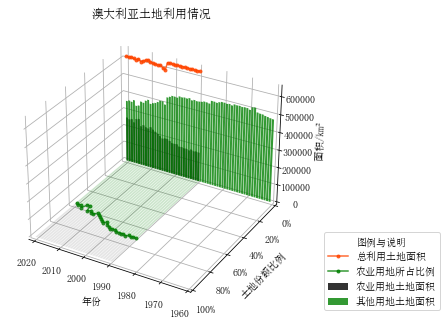

In [29]:
#绘制3d效果
from mpl_toolkits.mplot3d import Axes3D
import random

#设置坐标轴
fig = plt.figure()
ax3d1 = fig.add_subplot(projection='3d')
ax3d1 = Axes3D(fig)

#改变背景色
ax3d1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3d1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

#绘制折线图
# color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N))) #得到一个随机的颜色用于下面绘制该条折线图
# al_3dpl=ax3d1.plot(al_yar, al_var, zs=0, zdir='y',color='#FF1493',marker='.', alpha=0.8)
ol_3dpl=ax3d1.plot(ol_yar, ol_1990var+al_var[29:], zs=0, zdir='y',color='#FF4500',marker='.', alpha=0.8,label='总利用土地面积')

#绘制柱状图
# al_3dbar=ax3d1.bar(ol_yar, ol_1990var, zs=0, zdir='y',color='#FF4500', alpha=0.8,bottom=al_var[29:])
al_3dbar2=ax3d1.bar(ol_yar, ol_1990var, zs=0, zdir='y',color='black', alpha=0.8,label='农业用地土地面积')
al_3dbar=ax3d1.bar(al_yar, al_var, zs=0, zdir='y', color='g', alpha=0.8,label='其他用地土地面积')

#设置坐标轴题目,刻度范围
#在设置zdir = 'y'的情形下，其实y轴才是z轴，然后z轴变成了y轴
ax3d1.set_xlabel('年份')
ax3d1.set_ylabel('土地份额比例')
ax3d1.set_zlabel('面积/km$^{2}$')

# ax3d1.set_zlim ((-0.01,0.01))
ax3d1.set_xlim ((2021,1960))
ax3d1.set_ylim ((-1,0))
ax3d1.set_zlim ((0,650000))
plt.xticks(np.arange(1960,2021,10,dtype=None))
# plt.zticks(np.arange(0,650000,100000,dtype=None))
# plt.yticks(np.arange(-1,0,1),dtype=None))

#坐标轴标签
plt.yticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
# plt.zticks([0,-0.2,-0.4,-0.6,-0.8,-1],['0%','20%','40%','60%','80%','100%'])
##报错了:module 'matplotlib.pyplot' has no attribute 'zticks'

#设置网格
#设置消去风格线。默认True，
# ax3d1.grid(False)


#绘制百分比图
al_3dper=ax3d1.plot(al_yar[29:], np.zeros(31), -al_perdf, zdir='y',color='g',marker='.', alpha=0.8,label='农业用地所占比例')
# ol_3dper=ax3d1.plot(al_yar[29:], np.zeros(31),  -al_perdf-ol_perdf, zdir='y',color='#FF4500',marker='.', alpha=0.8,)
#填充颜色
# al_3dbar=ax3d1.bar(ol_perdf, ol_perdf, zs=0, zdir='z',color='#FF4500', alpha=0.8,bottom=al_var[29:])
al_3dbar=ax3d1.bar(al_yar[29:], -al_perdf, zs=0, zdir='z', color='g', alpha=0.2)
al_3dbar=ax3d1.bar(al_yar[29:], -ol_perdf, zs=0, zdir='z', color='gray', alpha=0.2,bottom=-al_perdf)

#设置图例
num1 = 1.10
num2 = 0
num3 = 3
num4 = 0
legend_1=plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,title='图例与说明')

#添加标题
plt.title("澳大利亚土地利用情况")

#保存图片
plt.savefig(figname3d, dpi=500,bbox_inches='tight', edgecolor='white')
plt.show()


In [ ]:
##没有成功的想法

# ax3d1.fill_between(al_yar[29:], y1=np.zeros(31), y2=(-al_perdf), facecolor='#FF1493', alpha=0.3)
# ax3d1.plot_trisurf(al_yar[29:60],-al_perdf+al_yar[29:60]*0 , al_yar[29:60]*0 ,  cmap=plt.get_cmap('rainbow'))
# x=np.linspace(1990,2020,31)
# y=np.linspace(0,-al_perdf,100)
# X, Y = np.meshgrid(x, y)
# ax3d1.plot_surface(X,
#                 Y,
#                 Z=X*0+0,
#                 color='g',
#                 alpha=0.6
#                ) 

# #挪动坐标轴
# ax3d1 = plt.gca()
# ax3d1.xaxis.set_ticks_position('bottom') 
# ax3d1.spines['bottom'].set_position(('data',0))

# from PIL import Image
# import numpy as np
# from matplotlib import pyplot as plt
 
# 创建3D对象
# fig = plt.figure(figsize=(20,8),dpi=100)
# ax = fig.add_subplot(111, projection='3d')

#插入图片
# 注释为国外大佬写的，汉字部分我的补充
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.cbook import get_sample_data
# import cv2
 
# # Read the image with Opencv
# img = cv2.imread('lc.png')
# # Change the color from BGR to RGB
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# # Orgird to store data
# x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]
# # In Python3 matplotlib assumes rgbdata in range 0.0 to 1.0
# img = img.astype('float32')/255
# fig = plt.Figure()
# # gca do not work thus use figure objects inbuilt function.
# ax3d1 = fig.add_subplot(projection='3d')
 
# # Plot data
# # rstride，cstride相当于设置图片显示的像素，当两项均等于1的时候相当于我写的程序
# ax3d1.plot_surface(x, y, np.atleast_2d(0), rstride=10, cstride=10, facecolors=img)
# fig.show() # Throws a AttributeError

# 读取图片
# img = Image.open('lc.png')
# pix = img.load()
# # 获取图片长宽
# width = img.size[0]
# height = img.size[1]
# # 创建x,y轴的长度
# x = np.arange(0,width)
# y = np.arange(0,height)
# x,y = np.meshgrid(x,y)
# z = np.zeros(width*height)+2019
# print(z)
# # 建立列表，后期使用
# color = ['r','g','b','k']
# # 遍历长宽，获得每个像素点的RGB值
# for i in range(width):
#     for j in range(height):
#         # 转化rgb为相对占比的元组
#         rgb= tuple(np.array(pix[i, j])/255)
#         color.append(rgb)
# # 在z=0的平面上作图
#  # 设置颜色，像素
# print(x)
# print(y)
# ax3d1.scatter(z,x,y/1036,color,alpha = 1)


# from PIL import Image
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
 
# img = Image.open("lc.png")
# x = img.size[0]
# y = img.size[1]
 
 
# for i in range(x):
#     for j in range(y):
 
#         r = hex(img.getpixel((i, j))[0])[2:]
#         b = hex(img.getpixel((i, j))[1])[2:]
#         g = hex(img.getpixel((i, j))[2])[2:]
 
#         if len(r) == 1:
#             r = '0' + r
#         if len(b) == 1:
#             b = '0' + b
#         if len(g) == 1:
#             g = '0' + g
#         col = '#' + r + b + g
#         # col = '#FF00FF'
#         ax3d1.scatter(i, j, 5, c=col, alpha=0.5)
# plt.show()